*   How to run a linear regression in Python ?
*                 y = a + b x + e

[[-0.4546606 ]
 [-1.24671871]]
[[1]
 [2]]


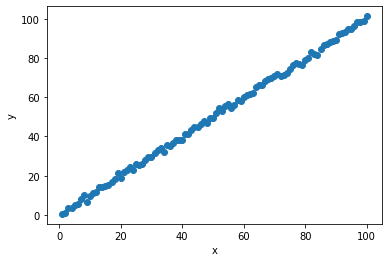

In [24]:
import numpy as np

np.random.seed(1234)         # so that the random numbers will be the same each time running the program


e = np.random.randn(100,1)     # Generate noise from N(0,1), 100 by 1 normally distributed data
x = np.arange(1,101)           # np.arange() function returns an evenly spaced values within the interval:
                               #      x=[1,2,...,100]'
x.shape = (100,1)              # make sure x be defined as 100 by 1 vector, asnp.arange() has undefined colums

print (e[0:2])                                  # check a couple of values
print (x[0:2])  

y = x + e                      # Generate y
                               # Note that the true value of (a,b) = (0,1)

# Plot the data

plt.scatter(x, y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [26]:
const = np.ones((100,1))          # The constant part
xx = np.hstack((const,x))         # Add the constant part to x


# Run the regression

reg = sm.OLS(endog=y, exog=xx)
results = reg.fit()

coeff = results.params           # paramter estimates, output of sm.OLS
print(' Regression coefficents  \n')
print(coeff)
Estd = results.bse
print(' Std Error of Regression coefficents  \n')
print(Estd)
tValues = results.tvalues
print('  t-values     \n')
print(tValues)


 Regression coefficents  

[0.04489209 0.99990552]
 Std Error of Regression coefficents  

[0.21065029 0.00362142]
  t-values     

[2.13111916e-01 2.76108632e+02]


In [27]:
# Add'l Info and A summary of the entire results

Werror = results.HC0_se          #  White’s (1980) heteroskedasticity robust standard errors.
                                   #   valid when data are not necessarily normally distributed 
print(' White’s (1980) heteroskedasticity robust standard errors   \n')
print(Werror)

R2 = results.rsquared
print(' R-sqaured   \n')
print(R2)


R2a = results.rsquared_adj
print(' Adjusted R-sqaured   \n')
print(R2a)



print(results.summary())

 White’s (1980) heteroskedasticity robust standard errors   

[0.20439623 0.00349769]
 R-sqaured   

0.9987161680224904
 Adjusted R-sqaured   

0.9987030676961893
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.624e+04
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.67e-143
Time:                        19:48:15   Log-Likelihood:                -145.32
No. Observations:                 100   AIC:                             294.6
Df Residuals:                      98   BIC:                             299.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    